In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import scipy.io as scio

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Input,Dense,RepeatVector,BatchNormalization,Activation,Conv1D,MaxPooling2D,UpSampling1D,Flatten,Conv2D,UpSampling2D,MaxPool1D,Flatten,LSTM
from tensorflow.keras.optimizers import  Adam
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_curve
from sklearn.metrics import recall_score,classification_report,auc,roc_curve
from sklearn.metrics import precision_recall_fscore_support,f1_score

from numpy.random import seed
seed(1)
os.environ['PYTHONHASHSEED']=str(0)
SEED=2019
DATA_SPLIT_PCT=0.2

nb_epoch=200
batch_size=64
input_dim=152
encoding_dim=64
hidden_dim=int(encoding_dim/2)
learning_rate=1e-3

In [2]:
# Import pandas library
import pandas as pd
import numpy as np
# Read csv data file
# Data without feature standardization
df = pd.read_csv('Labelled50GapRandom_LabelScale.csv')
# View the number of rows and columns
df.head()
df.dtypes
df.shape

(2169, 153)

In [3]:
# Import LabelEncoder
from sklearn import preprocessing
# Create LabelEncoder
le = preprocessing.LabelEncoder()

In [4]:
# Indicate the target column
target = df['Label_mL']
# Indicate the columns that will serve as features
features = df.drop('Label_mL', axis = 1)

In [5]:
'''
features = df[[  'Signal012',
                'Signal013',
                'Signal112',
                'Signal711',
                'Signal712',
                'Signal713',
                'Signal714' ]]   
print(features.shape)
'''

"\nfeatures = df[[  'Signal012',\n                'Signal013',\n                'Signal112',\n                'Signal711',\n                'Signal712',\n                'Signal713',\n                'Signal714' ]]   \nprint(features.shape)\n"

In [6]:
# Split data into train, validation and test sets
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split the dataset into training + development set and test set
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state = 0)
# Split the dataset into training set and development set
#x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size = 0.4, random_state = 10)
y_test_cate=to_categorical(y_test,num_classes=11)
y_train_cate=to_categorical(y_train,num_classes=11)
#数据标准化
scaler=StandardScaler().fit(x_train)
x_train_rescaled=scaler.transform(x_train)
x_test_rescaled=scaler.transform(x_test)
print(y_test.shape)

print(x_train_rescaled.shape)
x_train_rescaled=x_train_rescaled.reshape(1301,19,8)
x_test_rescaled=x_test_rescaled.reshape(868,19,8)

(868,)
(1301, 152)


In [7]:
PRE=[]
TRUE=[]
ACC=[]
for i in range(10):
#autoencoder
    input_img=Input(shape=(19,8))

    x=LSTM(32,activation='tanh')(input_img)

    x=Dense(16,activation='tanh')(x)

    LR=Dense(11,activation="softmax",name='LR')(x)
    
    model=Model(inputs=input_img,outputs=LR)

    # Training
# 选择评价函数，选择优化器，指定损失函数
    model.compile(metrics=['accuracy'],
                        loss= ['categorical_crossentropy'],
                        optimizer=Adam(lr=learning_rate))

    cp = ModelCheckpoint(filepath="autoencoder_classifier.h5",
                        save_best_only=True,
                        monitor='val_LR_accuracy',
                        verbose = 0)

    tb = TensorBoard(log_dir='./logs',
                    histogram_freq=0,
                    write_graph=True,
                    write_images=True)

    history = model.fit(x_train_rescaled,y_train_cate,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(x_test_rescaled, y_test_cate),
                          verbose=1).history
    acc=model.evaluate(x_test_rescaled,y_test_cate)
    pre=model.predict(x_test_rescaled)
    y_pred=np.argmax(pre,axis=1)
    PRE.append(y_pred)
    TRUE.append(y_test)
    ACC.append(acc[1])
print(np.mean(ACC),np.std(ACC))


Epoch 1/200


C:\Users\bhuah\.conda\envs\BHEvir\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


21/21 [==============================] - 2s 32ms/step - loss: 2.2528 - accuracy: 0.3067 - val_loss: 2.1200 - val_accuracy: 0.5115
Epoch 2/200
21/21 [==============================] - 0s 8ms/step - loss: 2.0019 - accuracy: 0.4950 - val_loss: 1.8216 - val_accuracy: 0.5288
Epoch 3/200
21/21 [==============================] - 0s 9ms/step - loss: 1.6928 - accuracy: 0.5081 - val_loss: 1.5059 - val_accuracy: 0.5599
Epoch 4/200
21/21 [==============================] - 0s 9ms/step - loss: 1.3939 - accuracy: 0.6549 - val_loss: 1.2319 - val_accuracy: 0.7154
Epoch 5/200
21/21 [==============================] - 0s 8ms/step - loss: 1.1322 - accuracy: 0.7510 - val_loss: 0.9931 - val_accuracy: 0.7811
Epoch 6/200
21/21 [==============================] - 0s 8ms/step - loss: 0.9057 - accuracy: 0.8186 - val_loss: 0.8039 - val_accuracy: 0.8249
Epoch 7/200
21/21 [==============================] - 0s 7ms/step - loss: 0.7422 - accuracy: 0.8332 - val_loss: 0.6745 - val_accuracy: 0.8456
Epoch 8/200
21/21 [=====

Epoch 59/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0232 - val_accuracy: 0.9942
Epoch 60/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0228 - val_accuracy: 0.9942
Epoch 61/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0223 - val_accuracy: 0.9954
Epoch 62/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy: 0.9954
Epoch 63/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0216 - val_accuracy: 0.9942
Epoch 64/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0213 - val_accuracy: 0.9942
Epoch 65/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0210 - val_accuracy: 0.9942

21/21 [==============================] - 0s 10ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0147 - val_accuracy: 0.9954
Epoch 117/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0147 - val_accuracy: 0.9954
Epoch 118/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0147 - val_accuracy: 0.9954
Epoch 119/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0146 - val_accuracy: 0.9954
Epoch 120/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 0.9954
Epoch 121/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0146 - val_accuracy: 0.9954
Epoch 122/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0145 - val_accuracy: 0.9954
Epoch 

Epoch 173/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 0.9954
Epoch 174/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 0.9954
Epoch 175/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 0.9954
Epoch 176/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 0.9954
Epoch 177/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 0.9954
Epoch 178/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0130 - val_accuracy: 0.9954
Epoch 179/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy:

21/21 [==============================] - 0s 12ms/step - loss: 0.0564 - accuracy: 0.9992 - val_loss: 0.0705 - val_accuracy: 0.9954
Epoch 30/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0533 - accuracy: 0.9985 - val_loss: 0.0688 - val_accuracy: 0.9942
Epoch 31/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0507 - accuracy: 0.9977 - val_loss: 0.0673 - val_accuracy: 0.9942
Epoch 32/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0503 - accuracy: 0.9977 - val_loss: 0.0711 - val_accuracy: 0.9931
Epoch 33/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0425 - accuracy: 0.9992 - val_loss: 0.0586 - val_accuracy: 0.9954
Epoch 34/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0390 - accuracy: 0.9985 - val_loss: 0.0588 - val_accuracy: 0.9954
Epoch 35/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0756 - accuracy: 0.9862 - val_loss: 0.2514 - val_accuracy: 0.9493
Epoch 36/200

21/21 [==============================] - 0s 11ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 0.9931
Epoch 87/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0314 - val_accuracy: 0.9931
Epoch 88/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0296 - val_accuracy: 0.9931
Epoch 89/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0295 - val_accuracy: 0.9931
Epoch 90/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0301 - val_accuracy: 0.9931
Epoch 91/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0294 - val_accuracy: 0.9931
Epoch 92/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0297 - val_accuracy: 0.9931
Epoch 93/200

21/21 [==============================] - 0s 9ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0286 - val_accuracy: 0.9931
Epoch 144/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9931
Epoch 145/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0297 - val_accuracy: 0.9931
Epoch 146/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0287 - val_accuracy: 0.9931
Epoch 147/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0294 - val_accuracy: 0.9931
Epoch 148/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0298 - val_accuracy: 0.9931
Epoch 149/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0297 - val_accuracy: 0.9931
Epoch 150/2

21/21 [==============================] - 0s 10ms/step - loss: 8.0617e-04 - accuracy: 1.0000 - val_loss: 0.0283 - val_accuracy: 0.9942
Epoch 200/200
28/28 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 0.9942
Epoch 1/200
21/21 [==============================] - 5s 51ms/step - loss: 2.3537 - accuracy: 0.1430 - val_loss: 2.2257 - val_accuracy: 0.3122
Epoch 2/200
21/21 [==============================] - 0s 10ms/step - loss: 2.1120 - accuracy: 0.3290 - val_loss: 1.9828 - val_accuracy: 0.3410
Epoch 3/200
21/21 [==============================] - 0s 10ms/step - loss: 1.8463 - accuracy: 0.3582 - val_loss: 1.6806 - val_accuracy: 0.3710
Epoch 4/200
21/21 [==============================] - 0s 9ms/step - loss: 1.5638 - accuracy: 0.4473 - val_loss: 1.4257 - val_accuracy: 0.5956
Epoch 5/200
21/21 [==============================] - 0s 9ms/step - loss: 1.3269 - accuracy: 0.6403 - val_loss: 1.1984 - val_accuracy: 0.7327
Epoch 6/200
21/21 [==============================] - 0s 1

Epoch 56/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0203 - val_accuracy: 0.9977
Epoch 57/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.0200 - val_accuracy: 0.9988
Epoch 58/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0193 - val_accuracy: 0.9977
Epoch 59/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0196 - val_accuracy: 0.9977
Epoch 60/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 0.9977
Epoch 61/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0186 - val_accuracy: 0.9977
Epoch 62/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0179 - val_accuracy: 0.9977

21/21 [==============================] - 0s 12ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 0.9977
Epoch 114/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 0.9977
Epoch 115/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 0.9977
Epoch 116/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 0.9977
Epoch 117/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 0.9977
Epoch 118/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 0.9977
Epoch 119/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 0.9977
Epoch 

21/21 [==============================] - 0s 12ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 0.9977
Epoch 171/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 0.9977
Epoch 172/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9977
Epoch 173/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 0.9977
Epoch 174/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9977
Epoch 175/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9977
Epoch 176/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.9977
Epoch 

Epoch 27/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0776 - accuracy: 0.9954 - val_loss: 0.0857 - val_accuracy: 0.9908
Epoch 28/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0722 - accuracy: 0.9969 - val_loss: 0.0791 - val_accuracy: 0.9931
Epoch 29/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0659 - accuracy: 0.9969 - val_loss: 0.0746 - val_accuracy: 0.9919
Epoch 30/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0609 - accuracy: 0.9969 - val_loss: 0.0709 - val_accuracy: 0.9931
Epoch 31/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0584 - accuracy: 0.9962 - val_loss: 0.0649 - val_accuracy: 0.9931
Epoch 32/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0540 - accuracy: 0.9969 - val_loss: 0.0616 - val_accuracy: 0.9931
Epoch 33/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0524 - accuracy: 0.9962 - val_loss: 0.0585 - val_accuracy: 0.9954

21/21 [==============================] - 0s 12ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0210 - val_accuracy: 0.9954
Epoch 85/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0208 - val_accuracy: 0.9954
Epoch 86/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0207 - val_accuracy: 0.9954
Epoch 87/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0206 - val_accuracy: 0.9954
Epoch 88/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0205 - val_accuracy: 0.9954
Epoch 89/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0206 - val_accuracy: 0.9954
Epoch 90/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0204 - val_accuracy: 0.9954
Epoch 91/200

21/21 [==============================] - 0s 10ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 0.9954
Epoch 142/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0178 - val_accuracy: 0.9954
Epoch 143/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 0.9954
Epoch 144/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 0.9954
Epoch 145/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 0.9954
Epoch 146/200
21/21 [==============================] - 0s 15ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0175 - val_accuracy: 0.9954
Epoch 147/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 0.9954
Epoch 1

Epoch 198/200
21/21 [==============================] - 0s 12ms/step - loss: 8.3689e-04 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 0.9942
Epoch 199/200
21/21 [==============================] - 0s 12ms/step - loss: 8.2584e-04 - accuracy: 1.0000 - val_loss: 0.0178 - val_accuracy: 0.9942
Epoch 200/200
28/28 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9942
Epoch 1/200
21/21 [==============================] - 8s 116ms/step - loss: 2.3261 - accuracy: 0.2121 - val_loss: 2.1901 - val_accuracy: 0.2558
Epoch 2/200
21/21 [==============================] - 0s 11ms/step - loss: 2.0559 - accuracy: 0.2767 - val_loss: 1.8890 - val_accuracy: 0.2972
Epoch 3/200
21/21 [==============================] - 0s 13ms/step - loss: 1.7526 - accuracy: 0.3451 - val_loss: 1.5995 - val_accuracy: 0.4735
Epoch 4/200
21/21 [==============================] - 0s 12ms/step - loss: 1.5101 - accuracy: 0.5619 - val_loss: 1.3921 - val_accuracy: 0.6498
Epoch 5/200
21/21 [===============

21/21 [==============================] - 0s 13ms/step - loss: 0.0224 - accuracy: 0.9985 - val_loss: 0.0514 - val_accuracy: 0.9908
Epoch 55/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0201 - accuracy: 0.9985 - val_loss: 0.0486 - val_accuracy: 0.9931
Epoch 56/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0192 - accuracy: 0.9985 - val_loss: 0.0478 - val_accuracy: 0.9931
Epoch 57/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0181 - accuracy: 0.9985 - val_loss: 0.0479 - val_accuracy: 0.9931
Epoch 58/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0174 - accuracy: 0.9985 - val_loss: 0.0469 - val_accuracy: 0.9931
Epoch 59/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0167 - accuracy: 0.9985 - val_loss: 0.0461 - val_accuracy: 0.9931
Epoch 60/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0159 - accuracy: 0.9985 - val_loss: 0.0460 - val_accuracy: 0.9931
Epoch 61/200

21/21 [==============================] - 0s 11ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0380 - val_accuracy: 0.9942
Epoch 112/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0380 - val_accuracy: 0.9942
Epoch 113/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0379 - val_accuracy: 0.9942
Epoch 114/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0379 - val_accuracy: 0.9942
Epoch 115/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0379 - val_accuracy: 0.9954
Epoch 116/200
21/21 [==============================] - 0s 14ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0379 - val_accuracy: 0.9942
Epoch 117/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0379 - val_accuracy: 0.9954
Epoch 

21/21 [==============================] - 0s 15ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0393 - val_accuracy: 0.9942
Epoch 169/200
21/21 [==============================] - 0s 16ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0393 - val_accuracy: 0.9942
Epoch 170/200
21/21 [==============================] - 0s 14ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0394 - val_accuracy: 0.9942
Epoch 171/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0395 - val_accuracy: 0.9942
Epoch 172/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0395 - val_accuracy: 0.9942
Epoch 173/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0395 - val_accuracy: 0.9942
Epoch 174/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0398 - val_accuracy: 0.9942
Epoch 

21/21 [==============================] - 0s 12ms/step - loss: 0.0666 - accuracy: 0.9954 - val_loss: 0.0681 - val_accuracy: 0.9919
Epoch 25/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0624 - accuracy: 0.9954 - val_loss: 0.0642 - val_accuracy: 0.9931
Epoch 26/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0642 - accuracy: 0.9931 - val_loss: 0.0630 - val_accuracy: 0.9942
Epoch 27/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0539 - accuracy: 0.9969 - val_loss: 0.0564 - val_accuracy: 0.9931
Epoch 28/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0490 - accuracy: 0.9962 - val_loss: 0.0510 - val_accuracy: 0.9942
Epoch 29/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0464 - accuracy: 0.9969 - val_loss: 0.0508 - val_accuracy: 0.9919
Epoch 30/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0425 - accuracy: 0.9969 - val_loss: 0.0461 - val_accuracy: 0.9931
Epoch 31/200

21/21 [==============================] - 0s 9ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 82/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 83/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 84/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 85/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 86/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 0.9988
Epoch 87/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 0.9988
Epoch 88/200
21/

21/21 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 0.9988
Epoch 139/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 0.9988
Epoch 140/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 0.9988
Epoch 141/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 0.9988
Epoch 142/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 0.9988
Epoch 143/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 0.9988
Epoch 144/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 0.9988
Epoch 1

21/21 [==============================] - 0s 13ms/step - loss: 7.9460e-04 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 0.9988
Epoch 195/200
21/21 [==============================] - 0s 13ms/step - loss: 7.8456e-04 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 0.9988
Epoch 196/200
21/21 [==============================] - 0s 13ms/step - loss: 7.7442e-04 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 0.9988
Epoch 197/200
21/21 [==============================] - 0s 12ms/step - loss: 7.6459e-04 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 0.9988
Epoch 198/200
21/21 [==============================] - 0s 11ms/step - loss: 7.5497e-04 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 0.9988
Epoch 199/200
21/21 [==============================] - 0s 11ms/step - loss: 7.4528e-04 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 0.9988
Epoch 200/200
28/28 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.9988
Epoch 1/200
21/21 [======

21/21 [==============================] - 0s 9ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy: 0.9965
Epoch 51/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.0267 - val_accuracy: 0.9965
Epoch 52/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.0260 - val_accuracy: 0.9965
Epoch 53/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0254 - val_accuracy: 0.9965
Epoch 54/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.0248 - val_accuracy: 0.9965
Epoch 55/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 1.0000 - val_loss: 0.0243 - val_accuracy: 0.9965
Epoch 56/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0239 - val_accuracy: 0.9965
Epoch 57/200
21/

21/21 [==============================] - 0s 9ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 0.9965
Epoch 108/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 0.9965
Epoch 109/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 0.9965
Epoch 110/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 0.9965
Epoch 111/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 0.9965
Epoch 112/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 0.9965
Epoch 113/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 0.9965
Epoch 114/2

21/21 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 0.9977
Epoch 165/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9977
Epoch 166/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9977
Epoch 167/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 0.9977
Epoch 168/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9977
Epoch 169/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9977
Epoch 170/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 0.9977
Epoch 

21/21 [==============================] - 0s 10ms/step - loss: 0.1051 - accuracy: 0.9931 - val_loss: 0.1133 - val_accuracy: 0.9885
Epoch 21/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0972 - accuracy: 0.9931 - val_loss: 0.1128 - val_accuracy: 0.9862
Epoch 22/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0893 - accuracy: 0.9931 - val_loss: 0.0950 - val_accuracy: 0.9896
Epoch 23/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0818 - accuracy: 0.9954 - val_loss: 0.0893 - val_accuracy: 0.9885
Epoch 24/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0739 - accuracy: 0.9962 - val_loss: 0.0824 - val_accuracy: 0.9896
Epoch 25/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0674 - accuracy: 0.9962 - val_loss: 0.0780 - val_accuracy: 0.9919
Epoch 26/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0633 - accuracy: 0.9977 - val_loss: 0.0736 - val_accuracy: 0.9919
Epoch 27/200
21/2

21/21 [==============================] - 0s 10ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0256 - val_accuracy: 0.9942
Epoch 78/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0256 - val_accuracy: 0.9942
Epoch 79/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0255 - val_accuracy: 0.9942
Epoch 80/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0256 - val_accuracy: 0.9942
Epoch 81/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0252 - val_accuracy: 0.9942
Epoch 82/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0252 - val_accuracy: 0.9942
Epoch 83/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 0.9942
Epoch 84/200
2

21/21 [==============================] - 0s 12ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0223 - val_accuracy: 0.9954
Epoch 135/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0223 - val_accuracy: 0.9954
Epoch 136/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0222 - val_accuracy: 0.9954
Epoch 137/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0223 - val_accuracy: 0.9954
Epoch 138/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0223 - val_accuracy: 0.9954
Epoch 139/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0222 - val_accuracy: 0.9954
Epoch 140/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0223 - val_accuracy: 0.9954
Epoch 

Epoch 191/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy: 0.9954
Epoch 192/200
21/21 [==============================] - 0s 11ms/step - loss: 9.9669e-04 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 0.9954
Epoch 193/200
21/21 [==============================] - 0s 12ms/step - loss: 9.8235e-04 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 0.9954
Epoch 194/200
21/21 [==============================] - 0s 11ms/step - loss: 9.6933e-04 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 0.9954
Epoch 195/200
21/21 [==============================] - 0s 12ms/step - loss: 9.5576e-04 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 0.9954
Epoch 196/200
21/21 [==============================] - 0s 12ms/step - loss: 9.4335e-04 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 0.9954
Epoch 197/200
21/21 [==============================] - 0s 16ms/step - loss: 9.3078e-04 - accuracy: 1.0000 - val_loss

21/21 [==============================] - 0s 11ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.0284 - val_accuracy: 0.9954
Epoch 48/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 0.9954
Epoch 49/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 0.9954
Epoch 50/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.0265 - val_accuracy: 0.9954
Epoch 51/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.0267 - val_accuracy: 0.9954
Epoch 52/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.0263 - val_accuracy: 0.9954
Epoch 53/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.0259 - val_accuracy: 0.9942
Epoch 54/200

21/21 [==============================] - 0s 11ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy: 0.9931
Epoch 105/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0193 - val_accuracy: 0.9931
Epoch 106/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0194 - val_accuracy: 0.9931
Epoch 107/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0193 - val_accuracy: 0.9931
Epoch 108/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0192 - val_accuracy: 0.9931
Epoch 109/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 0.9931
Epoch 110/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 0.9931
Epoch 

Epoch 161/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0186 - val_accuracy: 0.9931
Epoch 162/200
21/21 [==============================] - 0s 13ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0186 - val_accuracy: 0.9931
Epoch 163/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 0.9942
Epoch 164/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 0.9931
Epoch 165/200
21/21 [==============================] - 0s 11ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0186 - val_accuracy: 0.9931
Epoch 166/200
21/21 [==============================] - 0s 15ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 0.9931
Epoch 167/200
21/21 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy:

21/21 [==============================] - 0s 8ms/step - loss: 0.1577 - accuracy: 0.9900 - val_loss: 0.1581 - val_accuracy: 0.9839
Epoch 18/200
21/21 [==============================] - 0s 9ms/step - loss: 0.1389 - accuracy: 0.9908 - val_loss: 0.1417 - val_accuracy: 0.9873
Epoch 19/200
21/21 [==============================] - 0s 9ms/step - loss: 0.1235 - accuracy: 0.9915 - val_loss: 0.1292 - val_accuracy: 0.9896
Epoch 20/200
21/21 [==============================] - 0s 8ms/step - loss: 0.1084 - accuracy: 0.9939 - val_loss: 0.1173 - val_accuracy: 0.9896
Epoch 21/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0984 - accuracy: 0.9946 - val_loss: 0.1090 - val_accuracy: 0.9919
Epoch 22/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0911 - accuracy: 0.9962 - val_loss: 0.1039 - val_accuracy: 0.9885
Epoch 23/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0811 - accuracy: 0.9962 - val_loss: 0.0908 - val_accuracy: 0.9931
Epoch 24/200
21/2

21/21 [==============================] - 0s 9ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0260 - val_accuracy: 0.9954
Epoch 75/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0255 - val_accuracy: 0.9954
Epoch 76/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0253 - val_accuracy: 0.9954
Epoch 77/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 0.9954
Epoch 78/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 0.9954
Epoch 79/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 0.9954
Epoch 80/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0248 - val_accuracy: 0.9954
Epoch 81/200
21/21 

21/21 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0244 - val_accuracy: 0.9954
Epoch 132/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0245 - val_accuracy: 0.9954
Epoch 133/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0244 - val_accuracy: 0.9954
Epoch 134/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0243 - val_accuracy: 0.9954
Epoch 135/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 0.9954
Epoch 136/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0249 - val_accuracy: 0.9954
Epoch 137/200
21/21 [==============================] - 0s 8ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 0.9954
Epoch 138/200

21/21 [==============================] - 0s 8ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0265 - val_accuracy: 0.9954
Epoch 189/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0263 - val_accuracy: 0.9954
Epoch 190/200
21/21 [==============================] - 0s 8ms/step - loss: 9.9584e-04 - accuracy: 1.0000 - val_loss: 0.0266 - val_accuracy: 0.9954
Epoch 191/200
21/21 [==============================] - 0s 8ms/step - loss: 9.8265e-04 - accuracy: 1.0000 - val_loss: 0.0267 - val_accuracy: 0.9954
Epoch 192/200
21/21 [==============================] - 0s 8ms/step - loss: 9.6957e-04 - accuracy: 1.0000 - val_loss: 0.0263 - val_accuracy: 0.9954
Epoch 193/200
21/21 [==============================] - 0s 9ms/step - loss: 9.5688e-04 - accuracy: 1.0000 - val_loss: 0.0270 - val_accuracy: 0.9954
Epoch 194/200
21/21 [==============================] - 0s 8ms/step - loss: 9.4422e-04 - accuracy: 1.0000 - val_loss: 0.0270 - val_accuracy: 

In [8]:
pre_y=np.array(PRE).reshape(8680)
true_y=np.array(TRUE).reshape(8680)

In [9]:
# Import scikit-learn metrics methods
from sklearn.metrics import classification_report, confusion_matrix
# Print confusion matrix
print(confusion_matrix(pre_y, true_y))
# Print precision, recall and F1
print(classification_report(pre_y, true_y))

[[910   0   0   0   0   0   0   0   0   0   0]
 [  0 863   0   0   0   1   0   0   0   0   0]
 [  0   0 750   0   0   2   1   0   0   0   0]
 [  0   7   0 809   0   0   1   1   1   0   0]
 [  0   0   0   0 760   2   1   0   0   0   0]
 [  0   0   0   0   0 595   0   0   0   0   0]
 [  0   0   0   0   0   0 744   5   1   0   0]
 [  0   0   0   0   0   0   0 763   2   3   0]
 [  0   0   0   0   0   0   3   0 886   0   0]
 [  0   0   0   0   0   0   0   1   0 793   0]
 [  0   0   0   1   0   0   0   0   0   4 770]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       910
           1       0.99      1.00      1.00       864
           2       1.00      1.00      1.00       753
           3       1.00      0.99      0.99       819
           4       1.00      1.00      1.00       763
           5       0.99      1.00      1.00       595
           6       0.99      0.99      0.99       750
           7       0.99      0.99      0.99      

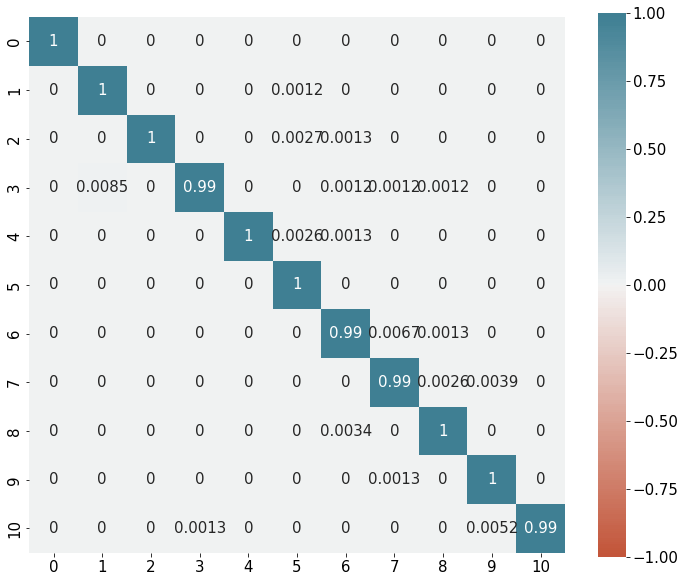

In [10]:
# Generating the correlation heatmap is optional
# The heatmap is just a visualization of the correlation matrix
# Import seaborn package to generate heatmap
import seaborn as sns
# Import pyplot to control the size of the plot
import matplotlib.pyplot as plt
# Set plot size
plt.rcParams.update({'font.size': 15, 'figure.figsize': (10, 8)})
plt.figure(figsize=(12,10))
# Generate the heatmap
ax = sns.heatmap(confusion_matrix(pre_y, true_y,normalize='true'),
 vmin = -1, vmax = 1, center = 0,
 cmap = sns.diverging_palette(20, 220, n=200),
 square = True,
 annot = True,
 #fmt="d"
                )